In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


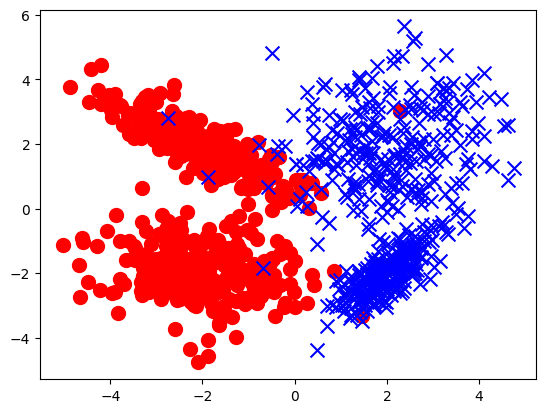

In [4]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [5]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [6]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [7]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [8]:
y_pred_proba = logreg.predict_proba(X)

In [9]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [10]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

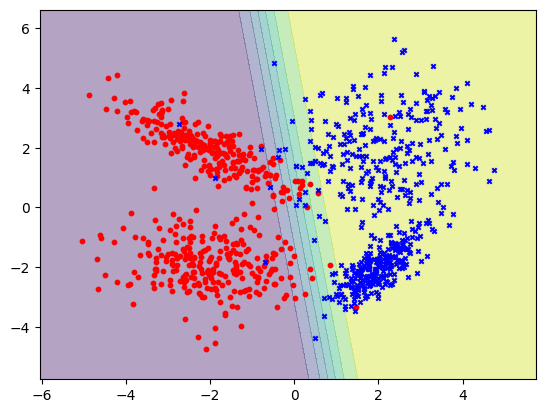

In [11]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=10)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=10)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [13]:
model.fit(X, y)
y_pred_lr = model.predict(X)

Выведите результаты работы библиотечной модели - в численном и в графическом виде.


accuracy = 0.98 F1-score = 0.98


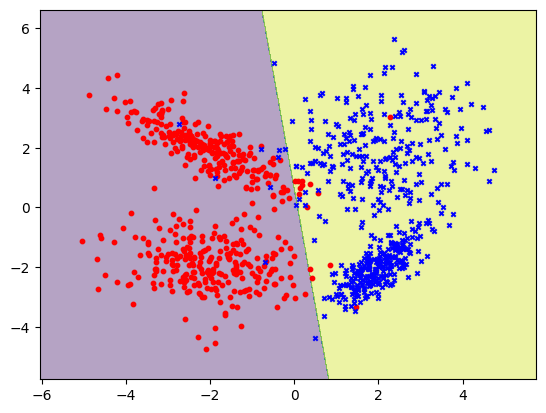

In [14]:
ac = accuracy_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
#XX = np.array([(1, *xx) for xx in XX])
Z = model.predict(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=10)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=10)

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

<ipython-input-5-01b0bc026110>:22: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
<ipython-input-5-01b0bc026110>:22: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


accuracy = 0.03 F1-score = 0.02


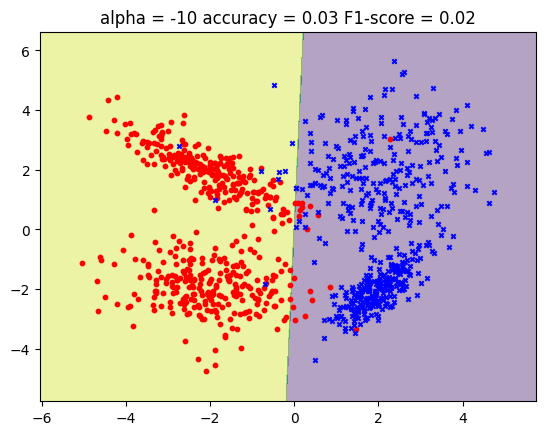

accuracy = 0.71 F1-score = 0.75


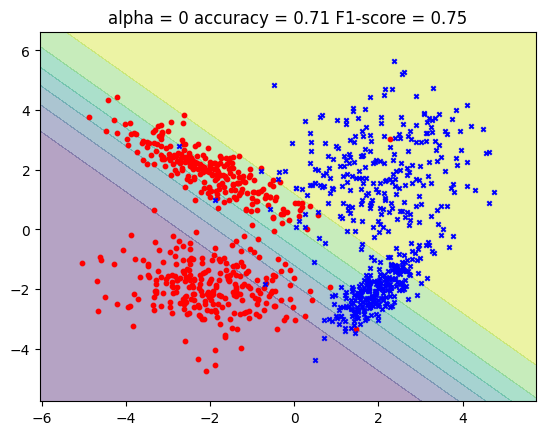

accuracy = 0.71 F1-score = 0.75


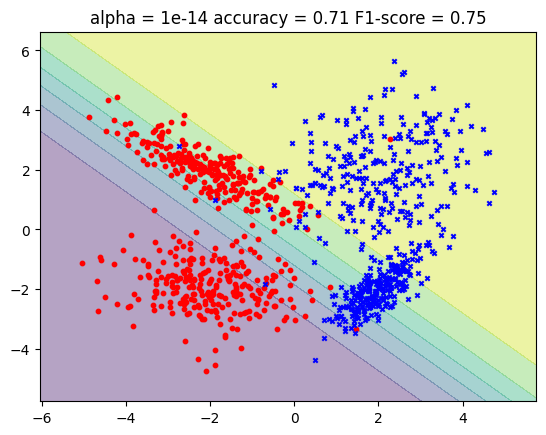

accuracy = 0.71 F1-score = 0.75


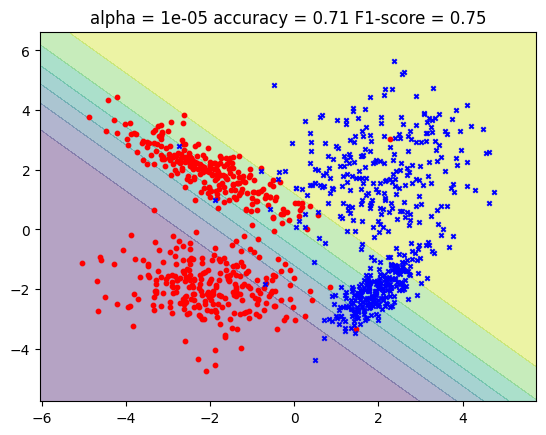

accuracy = 0.98 F1-score = 0.98


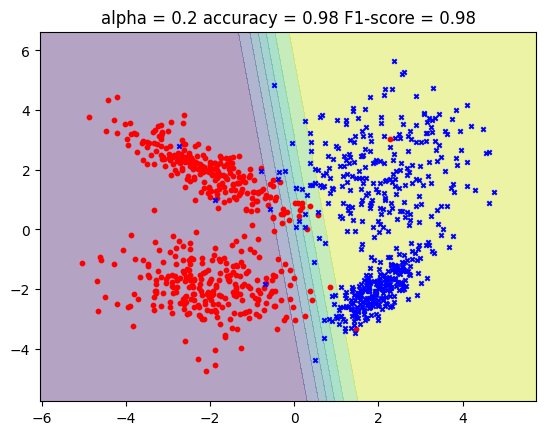

accuracy = 0.98 F1-score = 0.98


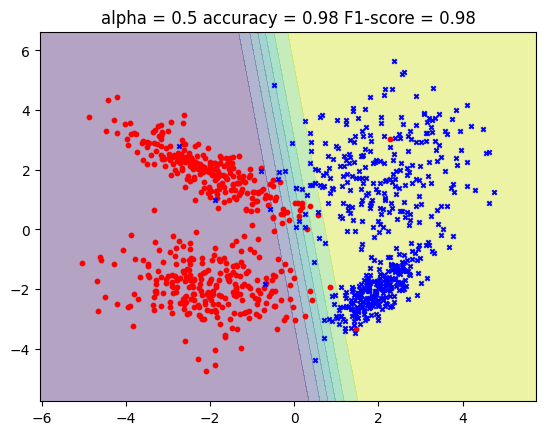

accuracy = 0.98 F1-score = 0.98


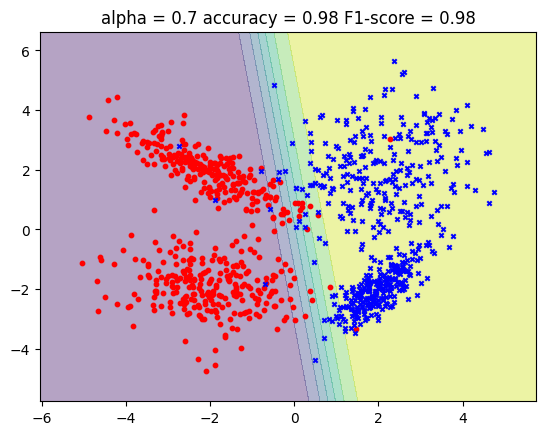

accuracy = 0.98 F1-score = 0.98


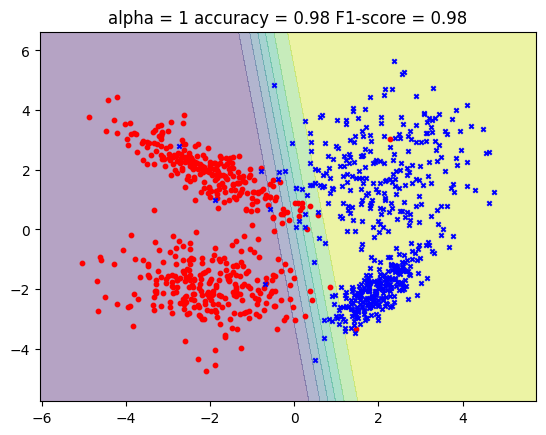

accuracy = 0.98 F1-score = 0.98


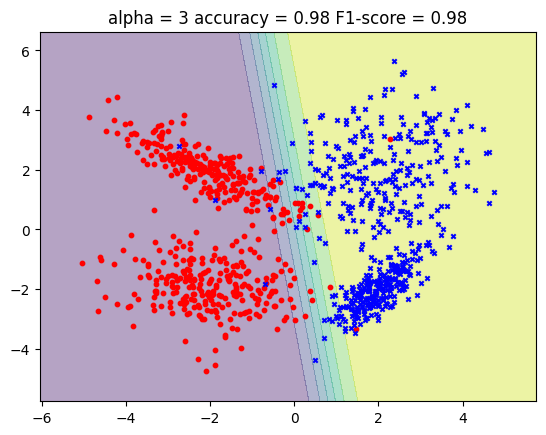

accuracy = 0.98 F1-score = 0.98


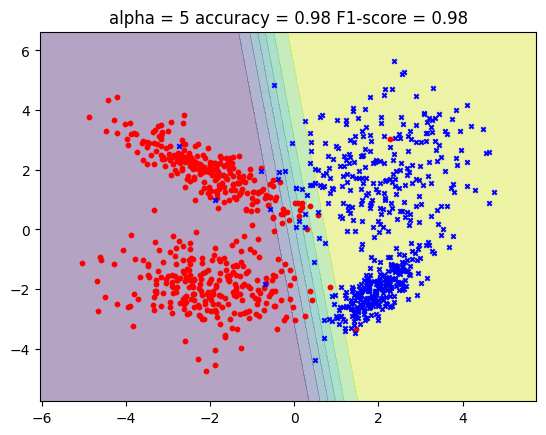

accuracy = 0.98 F1-score = 0.98


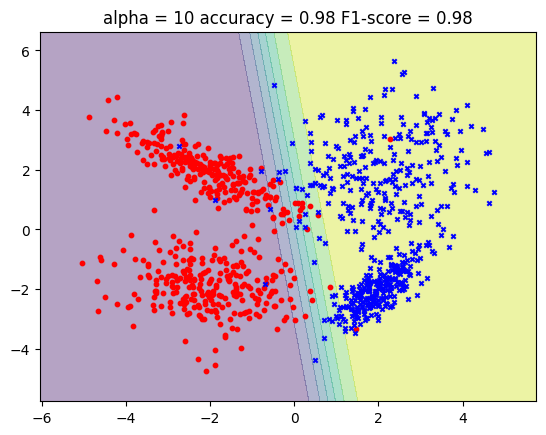

<ipython-input-5-01b0bc026110>:22: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


accuracy = 0.98 F1-score = 0.98


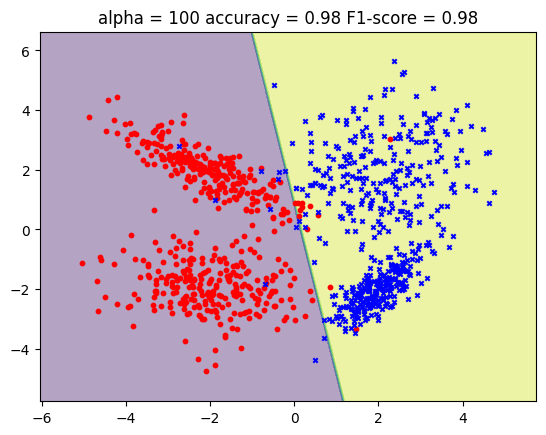

<ipython-input-5-01b0bc026110>:22: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


accuracy = 0.98 F1-score = 0.98


<ipython-input-5-01b0bc026110>:22: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


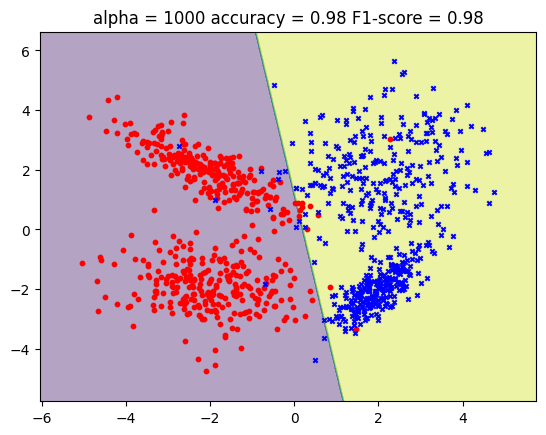

In [15]:
nums = (-10, 0, 0.00000000000001, 0.00001, 0.2, 0.5, 0.7, 1, 3, 5, 10, 100, 1000)
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
for el in nums:
    logreg = LogReg(alpha=el)
    logreg.fit(X, y)
    y_pred = logreg.predict(X)
    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
    y_pred_proba = logreg.predict_proba(X)
    xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
    XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
    XX = np.array([(1, *xx) for xx in XX])
    Z = logreg.predict_proba(XX)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=10)
    plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=10)
    plt.title(f'alpha = {el} accuracy = {ac:.2f} F1-score = {f1:.2f}')
    plt.show()

Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [16]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        if not all(X[:, 0] == np.ones(X.shape[0])):
            X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        if not all(X[:, 0] == np.ones(X.shape[0])):
            X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)
    def predict(self, X):
        if not all(X[:, 0] == np.ones(X.shape[0])):
            X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

accuracy = 0.98 F1-score = 0.98


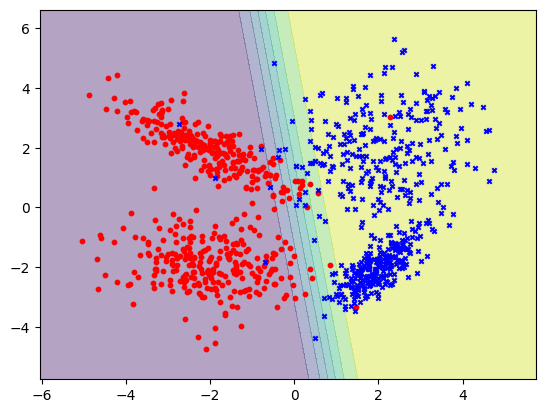

In [17]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
y_pred_proba = logreg.predict_proba(X)
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01),
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=10)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=10)

Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

ВЫВОД: чем больше по модулю class_sep, тем больше разделены классы и тем точнее будет модель

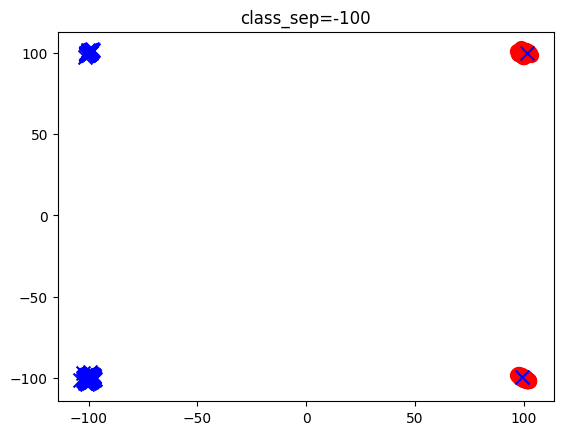

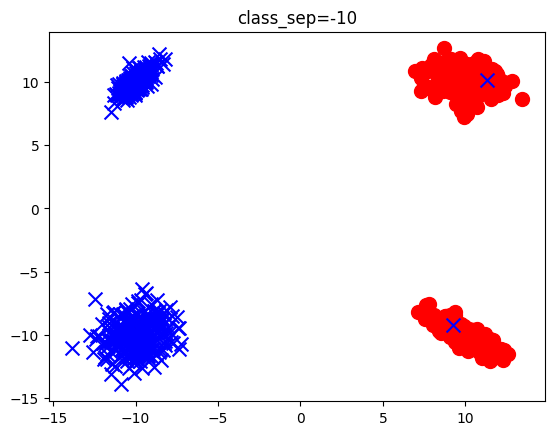

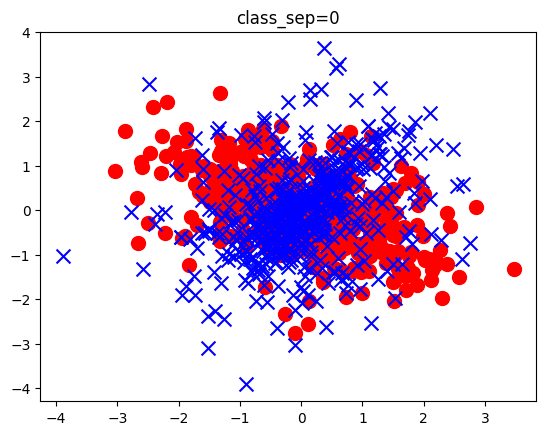

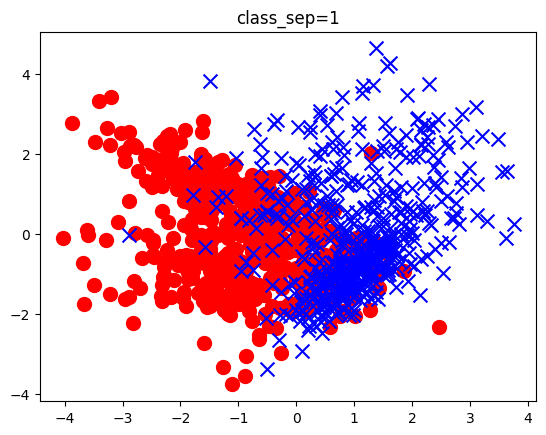

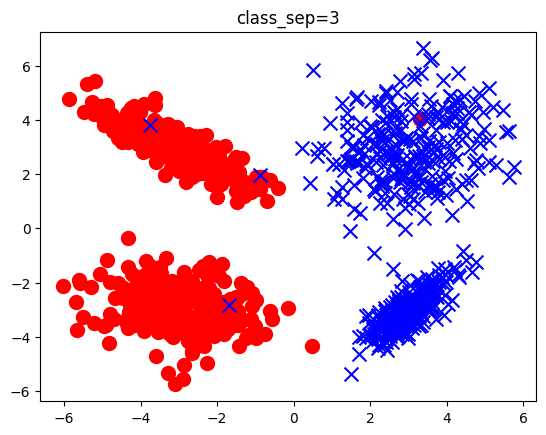

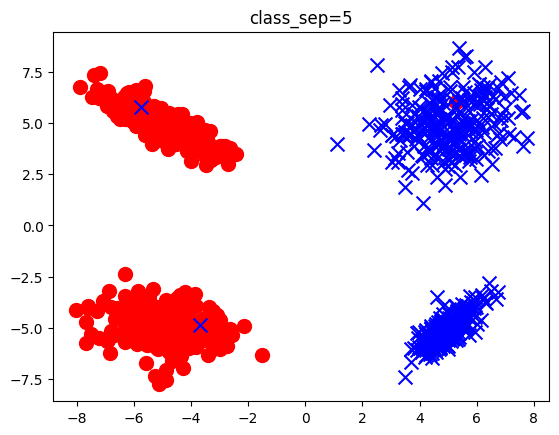

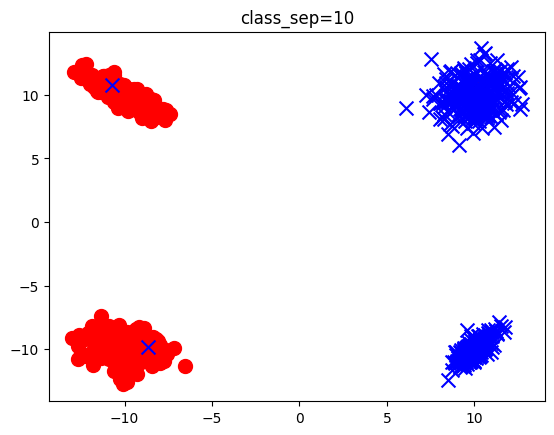

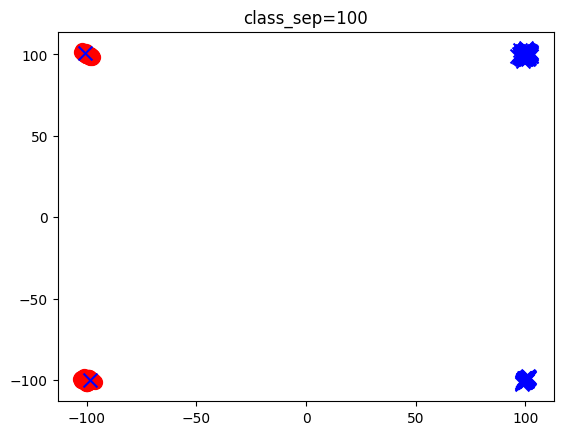

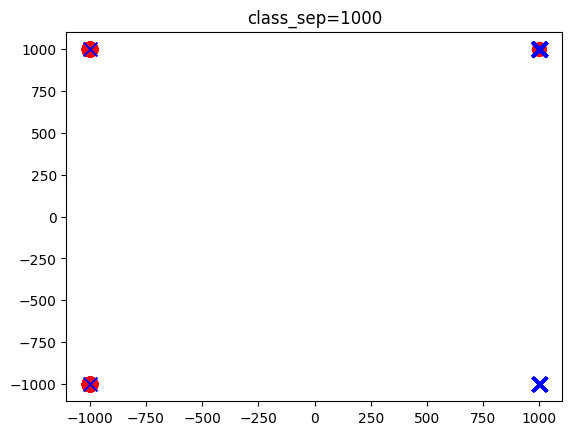

In [18]:
seps = [-100 ,-10, 0, 1, 3, 5, 10, 100, 1000]
for el in seps:
    X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=el,
                            random_state=1)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
    plt.title(f"class_sep={el}")
    plt.show()

Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [19]:
X,y = make_classification(n_samples=1000,
                        n_features=1000,
                        n_informative=2,
                        n_redundant=0,
                        n_classes=2,
                        class_sep=2,
                        random_state=1)

In [20]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')
y_pred_proba = logreg.predict_proba(X)

accuracy = 1.00 F1-score = 1.00


Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [26]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X,y = make_classification(n_samples=2000,
                        n_features=4,
                        n_informative=4,
                        n_redundant=0,
                        n_classes=8,
                        class_sep=2,
                        random_state=1)
clf = OneVsRestClassifier(SVC()).fit(X, y)
y_pred = clf.predict(X)
ac = accuracy_score(y, y_pred)
ac

0.9335

Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [35]:
X,y = make_classification(n_samples=100,
                        n_features=3,
                        n_informative=3,
                        n_redundant=0,
                        n_classes=3,
                        class_sep=2,
                        random_state=1)
model = LogisticRegression()
model.fit(X, y)
a = model.predict_proba(X)
for el in a:
    print(el)

[0.85168419 0.03327788 0.11503794]
[0.00827757 0.98220867 0.00951375]
[0.00138608 0.99537309 0.00324083]
[9.59590232e-01 7.32626023e-04 3.96771418e-02]
[0.94587626 0.04756016 0.00656359]
[9.97734325e-01 2.20399545e-04 2.04527566e-03]
[6.19226144e-05 8.10800863e-01 1.89137214e-01]
[0.95548601 0.03251337 0.01200062]
[0.89293753 0.05406078 0.05300169]
[0.7658101  0.01997116 0.21421874]
[9.99078487e-01 3.49007757e-04 5.72504995e-04]
[0.9937842  0.00181126 0.00440454]
[6.86407365e-05 9.61532621e-01 3.83987387e-02]
[0.98905513 0.00105539 0.00988948]
[0.01354412 0.98011803 0.00633785]
[0.00148069 0.50184042 0.49667888]
[0.00560162 0.16495562 0.82944276]
[0.05706594 0.00272828 0.94020578]
[0.07253522 0.90467258 0.0227922 ]
[9.97443477e-01 5.58211559e-04 1.99831190e-03]
[3.05945264e-06 9.51206664e-01 4.87902766e-02]
[1.65872836e-04 3.34801792e-01 6.65032335e-01]
[0.9405682  0.03531241 0.02411939]
[9.98857469e-01 2.13581054e-04 9.28949975e-04]
[0.94904925 0.00478813 0.04616262]
[1.75436126e-05 9